In [ ]:
#--<Python Standard Libs>--
import time, warnings
import sys, os, subprocess
from dataclasses import dataclass, field
from typing import List, Tuple
import joblib
import pip
import pickle

# --<DataScience>--
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from scipy.spatial import ConvexHull, QhullError
from scipy.fft import fft

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from scipy.interpolate import PchipInterpolator
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# --<Feature Engineering>--
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from scipy.interpolate import interp1d
from scipy.interpolate import BSpline, splrep


# --<Machine Learning>--
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import hdbscan
from sklearn.mixture import BayesianGaussianMixture
from minisom import MiniSom
from sklearn.cluster import KMeans
import torch


from dataclasses import dataclass, field

assert sys.version_info >= (3, 5)
plt.style.use('dark_background')
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}

new_datasets_path:str = ""
image_path:str = ""
root: str = ""
dataset_path : str = ""
Save_path = ""
os.chdir(new_datasets_path)

> # KNN Analysis

In [32]:
Dataset = pd.read_csv("GeometricalProperties.csv")
Dataset.drop(Dataset.columns[[0]], axis=1, inplace=True)
Dataset.head()

,breath_id,u_in_std,pressure_std,Polynomial_Area,Hull_Area,ft_TV_1,ft_TV_2,ft_TV_3,ft_TV_4,ft_TV_5,...,ft_P_2,ft_P_3,ft_P_4,ft_P_5,Perimeter,Width,Height,Centroid_X,Centroid_Y,Curvature
0,3,0.000000,0.000000,282.157479,350.167422,484.607933,183.391093,68.468914,56.159057,51.404353,...,409.824319,164.998616,67.671789,116.198749,122.759376,18.353980,22.777895,6.057599,13.534698,11.190253
1,7,0.000000,0.000000,28.139413,74.872299,300.129994,60.284442,68.542576,55.210521,40.204153,...,89.005645,52.755145,37.449278,53.714602,65.228595,8.975885,9.982905,3.751625,8.033555,13.949885
2,10,-1.221946,-0.984998,218.777887,272.316931,477.517065,167.435953,75.304841,40.280884,57.576735,...,390.368703,175.425250,41.169516,109.287272,111.338845,16.383765,21.793665,5.968963,13.086522,4.491883
3,20,0.000000,0.000000,31.145178,15.969105,274.582413,79.187200,56.413160,32.779015,28.114756,...,34.608035,28.938086,14.786057,1.780922,38.983140,5.990302,3.936920,3.432280,6.852479,254.399679
4,40,0.000000,0.000000,237.400212,301.631449,434.662665,101.799568,154.094102,80.326598,43.306234,...,398.454220,279.277437,135.713795,30.636842,105.555013,13.125972,27.417837,5.433283,12.155018,11.018074


In [33]:
b_ids = Dataset['breath_id']
Dataset.drop(Dataset.columns[[0]], axis=1, inplace=True)
Dataset.head()

,u_in_std,pressure_std,Polynomial_Area,Hull_Area,ft_TV_1,ft_TV_2,ft_TV_3,ft_TV_4,ft_TV_5,ft_P_1,ft_P_2,ft_P_3,ft_P_4,ft_P_5,Perimeter,Width,Height,Centroid_X,Centroid_Y,Curvature
0,0.000000,0.000000,282.157479,350.167422,484.607933,183.391093,68.468914,56.159057,51.404353,1082.775828,409.824319,164.998616,67.671789,116.198749,122.759376,18.353980,22.777895,6.057599,13.534698,11.190253
1,0.000000,0.000000,28.139413,74.872299,300.129994,60.284442,68.542576,55.210521,40.204153,642.684398,89.005645,52.755145,37.449278,53.714602,65.228595,8.975885,9.982905,3.751625,8.033555,13.949885
2,-1.221946,-0.984998,218.777887,272.316931,477.517065,167.435953,75.304841,40.280884,57.576735,1046.921734,390.368703,175.425250,41.169516,109.287272,111.338845,16.383765,21.793665,5.968963,13.086522,4.491883
3,0.000000,0.000000,31.145178,15.969105,274.582413,79.187200,56.413160,32.779015,28.114756,548.198314,34.608035,28.938086,14.786057,1.780922,38.983140,5.990302,3.936920,3.432280,6.852479,254.399679
4,0.000000,0.000000,237.400212,301.631449,434.662665,101.799568,154.094102,80.326598,43.306234,972.401460,398.454220,279.277437,135.713795,30.636842,105.555013,13.125972,27.417837,5.433283,12.155018,11.018074


In [22]:
Dataset.shape[0]

11376

In [34]:
scaler =  StandardScaler()
scaled_features = scaler.fit_transform(Dataset)
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Experimentation: 
- Implementation of **Geometrical Extration from TimeShifted data**
- Self-Organazing Maps 
- Label Engineering

In [24]:
SOM_Scaler = MinMaxScaler()
data_scaled = SOM_Scaler.fit_transform(Dataset)

Neural_Grid = (8, 8)
Neural_SOM = MiniSom(Neural_Grid[0], Neural_Grid[1], data_scaled.shape[1], sigma=0.1, learning_rate=2) #learning Rate dropped from 0.1, sigma boosted was 2.5


Neural_SOM.random_weights_init(data_scaled)
Neural_SOM.train_batch(data_scaled, num_iteration=1000000) 


win_map = Neural_SOM.win_map(data_scaled)

def topographic_error(som, data):
    te = 0
    for x in data:
        # Reshape input to 2D (MiniSom expects 2D inputs)
        x_2d = x.reshape(1, -1)
        
        # Get distances and find BMUs
        distances = som._distance_from_weights(x_2d)
        distances = distances.reshape(som._weights.shape[0], som._weights.shape[1])
        
        # Find first and second BMUs
        sorted_indices = np.argsort(distances.flatten())
        first_bmu = np.unravel_index(sorted_indices[0], (som._weights.shape[0], som._weights.shape[1]))
        second_bmu = np.unravel_index(sorted_indices[1], (som._weights.shape[0], som._weights.shape[1]))
        
        # Check adjacency (Manhattan distance)
        if abs(first_bmu[0] - second_bmu[0]) + abs(first_bmu[1] - second_bmu[1]) > 1:
            te += 1
    return te / len(data)

te = topographic_error(Neural_SOM, data_scaled)

# ================================================
# Step 3: Clustering Metrics (Fixed for 2D Data)
# ================================================
labels = np.array([Neural_SOM.winner(x) for x in data_scaled])
numeric_labels = [f"{i}_{j}" for i, j in labels]  # Encode as strings

# Silhouette Score requires >=2 clusters
if len(np.unique(numeric_labels)) > 1:
    silhouette = silhouette_score(data_scaled, numeric_labels)
else:
    silhouette = -1  # Indicate invalid value

davies_bouldin = davies_bouldin_score(data_scaled, numeric_labels)

print(f"""
Performance Metrics:
- Quantization Error: {Neural_SOM.quantization_error(data_scaled):.4f} (Close to 0 = better)
- Topographic Error: {te:.4f} (Close to 0 = better)
- Silhouette Score: {silhouette:.4f} (closer to 1 = better)
- Davies-Bouldin Index: {davies_bouldin:.4f} (closer to 0 = better)
""")



# Performance Metrics:
# - Quantization Error: 0.2465 (Close to 0 = better)
# - Topographic Error: 0.7670 (Close to 0 = better)
# - Silhouette Score: 0.2944 (closer to 1 = better)
# - Davies-Bouldin Index: 1.4100 (closer to 0 = better)


Performance Metrics:
- Quantization Error: 0.2348 (Close to 0 = better)
- Topographic Error: 0.9999 (Close to 0 = better)
- Silhouette Score: 0.2762 (closer to 1 = better)
- Davies-Bouldin Index: 1.3708 (closer to 0 = better)



/home/molderon/.local/lib/python3.13/site-packages/minisom.py:631: RuntimeWarning: invalid value encountered in sqrt
  return sqrt(-2 * cross_term + input_data_sq + weights_flat_sq.T)


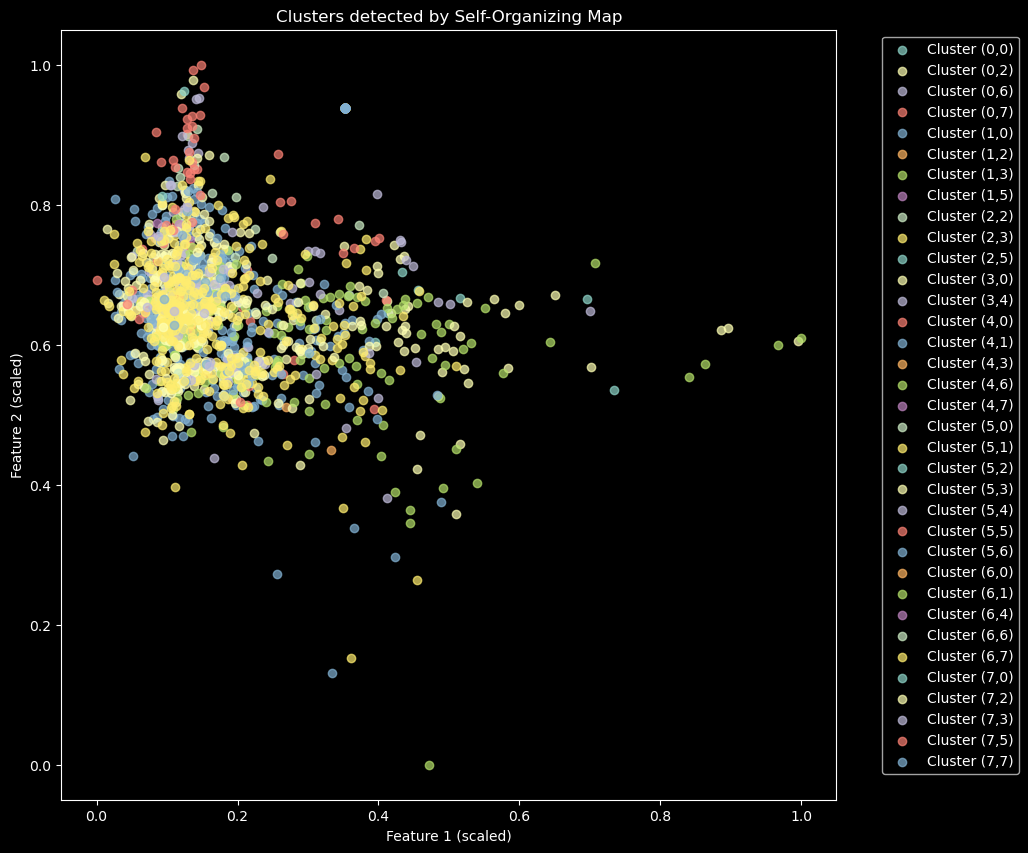

In [25]:

plt.figure(figsize=(10, 10))
for i in range(Neural_Grid[0]):
    for j in range(Neural_Grid[1]):
        if (i, j) in win_map:
            cluster = np.array(win_map[(i, j)])
            plt.scatter(cluster[:, 0], cluster[:, 1], label=f"Cluster ({i},{j})", alpha=0.7)

plt.title("Clusters detected by Self-Organizing Map")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [29]:
grid_width = 8
flattened_labels = [i * grid_width + j for (i, j) in labels]
Dataset['Cluster'] = flattened_labels
Dataset['breath_id'] = b_ids
Dataset.head()

,u_in_std,pressure_std,Polynomial_Area,Hull_Area,ft_TV_1,ft_TV_2,ft_TV_3,ft_TV_4,ft_TV_5,ft_P_1,...,ft_P_4,ft_P_5,Perimeter,Width,Height,Centroid_X,Centroid_Y,Curvature,Cluster,breath_id
0,0.000000,0.000000,282.157479,350.167422,484.607933,183.391093,68.468914,56.159057,51.404353,1082.775828,...,67.671789,116.198749,122.759376,18.353980,22.777895,6.057599,13.534698,11.190253,40,3
1,0.000000,0.000000,28.139413,74.872299,300.129994,60.284442,68.542576,55.210521,40.204153,642.684398,...,37.449278,53.714602,65.228595,8.975885,9.982905,3.751625,8.033555,13.949885,21,7
2,-1.221946,-0.984998,218.777887,272.316931,477.517065,167.435953,75.304841,40.280884,57.576735,1046.921734,...,41.169516,109.287272,111.338845,16.383765,21.793665,5.968963,13.086522,4.491883,24,10
3,0.000000,0.000000,31.145178,15.969105,274.582413,79.187200,56.413160,32.779015,28.114756,548.198314,...,14.786057,1.780922,38.983140,5.990302,3.936920,3.432280,6.852479,254.399679,61,20
4,0.000000,0.000000,237.400212,301.631449,434.662665,101.799568,154.094102,80.326598,43.306234,972.401460,...,135.713795,30.636842,105.555013,13.125972,27.417837,5.433283,12.155018,11.018074,28,40


In [30]:
Dataset.to_csv("SOM_Clustered.csv")

In [ ]:

Dataset.to_csv("Cleaned_CG.csv")

> # Support Vector Machine Clustering

> #  Bayesian - Gaussian Mixture

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LogNorm

# Set a dark theme for the plot using Seaborn
sns.set_theme(style="darkgrid", rc={"axes.facecolor": "#1c1c1c", "grid.color": "#333333", "figure.facecolor": "#1c1c1c"})

def plot_centroids(centroids, weights=None, circle_color='#2ECC71', cross_color='white'):
    # Filter centroids by weight, if applicable
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    
    # Plot centroids with darker colors
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=120, linewidths=3,
                edgecolor=circle_color, facecolor='none', zorder=10, alpha=1.0)
    
    # Annotate centroids with index labels
    for idx, (x, y) in enumerate(centroids):
        plt.text(x, y, str(idx), color=cross_color, fontsize=14,
                 ha='center', va='center', fontweight='bold', zorder=15)

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    # Define the plot limits and mesh grid
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    
    # Score samples for contour plotting
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot filled contours for the density with darker colors
    plt.contourf(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12), cmap="inferno", alpha=0.9)

    # Add contour lines in a darker shade for contrast
    plt.contour(xx, yy, Z, norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12), linewidths=1, colors='dimgray')

    # Plot decision boundaries for clusters in a bold color
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, linewidths=2, colors='#FF5733', linestyles='dashed', zorder=15)

    # Plot data points with a darker blue color
    plt.scatter(X[:, 0], X[:, 1], color='#1f1f1f', s=20, marker='o', alpha=0.8)

    # Plot centroids
    plot_centroids(clusterer.means_, clusterer.weights_)

    # Customize axis labels and grid colors
    plt.xlabel("$x_1$", fontsize=14, color="white")
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0, color="white")
    else:
        plt.tick_params(labelleft=False)

    plt.xticks(color="white")
    plt.yticks(color="white")
    
    plt.show()

In [28]:
bgm = BayesianGaussianMixture(
    n_components=12, 
    covariance_type='full',
    n_init=10,
    tol=1e-2,
    max_iter=200,
    random_state=42,
    reg_covar=1e-1,
    weight_concentration_prior_type='dirichlet_process',
    weight_concentration_prior=2,# Key parameter to tune
    init_params='kmeans'          # Improved initialization
)
bgm.fit(reduced_features)
np.round(bgm.weights_, 4)

array([2.993e-01, 2.748e-01, 3.970e-02, 1.370e-02, 2.967e-01, 7.050e-02,
       5.100e-03, 1.000e-04, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

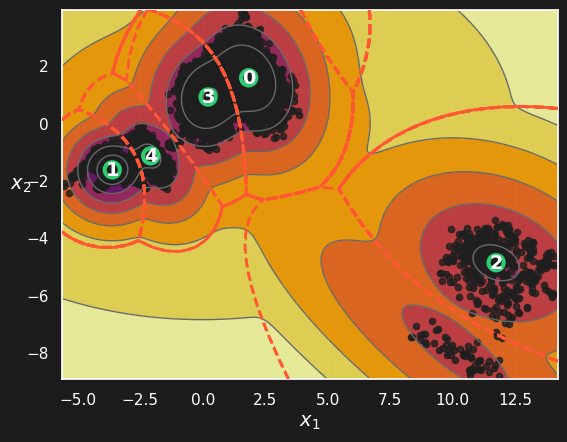

In [31]:
plot_gaussian_mixture(bgm, reduced_features)

In [32]:
BGM_labels = bgm.predict(reduced_features)
silhouette_avg = silhouette_score(reduced_features, BGM_labels)
silhouette_avg

# previous: np.float64(0.5396406575042436)

np.float64(0.5399639186450161)

In [71]:
print(f"Converged: {bgm.converged_}")
print(f"Iterations: {bgm.n_iter_}")
print("Weight distribution:", np.sort(bgm.weights_)[::-1])

Converged: False
Iterations: 50
Weight distribution: [0.29709527 0.27480081 0.15510791 0.14569068 0.07061387 0.03965993
 0.01188341 0.00514813]


> # HDBSCAN Experimentation

In [74]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
cluser_model = hdbscan.HDBSCAN(
    min_cluster_size=3,         
    min_samples=1,               
    cluster_selection_epsilon=0.3, 
    metric='euclidean',          
    cluster_selection_method='leaf',
    leaf_size=2,
    algorithm='best',
    alpha=3.0,
    allow_single_cluster=True                                       
)
cluster_labels = cluser_model.fit_predict(reduced_features)

# --- Performance Metrics ---
n_clusters = len(np.unique(cluster_labels)) - (1 if -1 in cluster_labels else 0)
noise_ratio = np.sum(cluster_labels == -1) / len(cluster_labels)

print(f"\n==== HDBSCAN Results ====")
print(f"Estimated clusters: {n_clusters}")
print(f"Noise points: {noise_ratio:.1%}")
print(f"Silhouette Score: {silhouette_score(reduced_features, cluster_labels):.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(reduced_features, cluster_labels):.1f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(reduced_features, cluster_labels):.3f}")

/home/molderon/.local/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/molderon/.local/lib/python3.13/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



==== HDBSCAN Results ====
Estimated clusters: 10
Noise points: 0.0%
Silhouette Score: 0.692
Calinski-Harabasz Index: 12152.1
Davies-Bouldin Index: 0.567


> Appending cluster Labels to the dataset of extracted geometrical properties

In [43]:
Dataset['Cluster'] = cluster_labels
Dataset['breath_id'] = b_ids
Dataset.head()

,u_in_std,pressure_std,Polynomial_Area,Hull_Area,ft_TV_1,ft_TV_2,ft_TV_3,ft_TV_4,ft_TV_5,ft_P_1,...,ft_P_4,ft_P_5,Perimeter,Width,Height,Centroid_X,Centroid_Y,Curvature,Cluster,breath_id
0,0.000000,0.000000,282.157479,350.167422,484.607933,183.391093,68.468914,56.159057,51.404353,1082.775828,...,67.671789,116.198749,122.759376,18.353980,22.777895,6.057599,13.534698,11.190253,0,3
1,0.000000,0.000000,28.139413,74.872299,300.129994,60.284442,68.542576,55.210521,40.204153,642.684398,...,37.449278,53.714602,65.228595,8.975885,9.982905,3.751625,8.033555,13.949885,1,7
2,-1.221946,-0.984998,218.777887,272.316931,477.517065,167.435953,75.304841,40.280884,57.576735,1046.921734,...,41.169516,109.287272,111.338845,16.383765,21.793665,5.968963,13.086522,4.491883,0,10
3,0.000000,0.000000,31.145178,15.969105,274.582413,79.187200,56.413160,32.779015,28.114756,548.198314,...,14.786057,1.780922,38.983140,5.990302,3.936920,3.432280,6.852479,254.399679,1,20
4,0.000000,0.000000,237.400212,301.631449,434.662665,101.799568,154.094102,80.326598,43.306234,972.401460,...,135.713795,30.636842,105.555013,13.125972,27.417837,5.433283,12.155018,11.018074,0,40


In [44]:
Dataset.to_csv("Final_Dataset.csv")